In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import model_selection
from sklearn import preprocessing

#On importe les donnes
B = pd.read_csv('10var.csv', delimiter= ',',header=0)

In [2]:
B.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
for i in range(5822):
    B.at[i,'cle'] = B.at[i,'cle']+1
print(B)

       cle  mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0        1        6          0      0              3            5          0   
1        2        0          0      2              4            2          0   
2        3        6          0      2              4            2          0   
3        4        6          0      0              4            2          0   
4        5        0          0      0              3            6          0   
...    ...      ...        ...    ...            ...          ...        ...   
5817  5818        6          0      2              3            3          0   
5818  5819        0          0      0              5            5          0   
5819  5820        6          0      2              3            4          0   
5820  5821        6          0      0              6            0          0   
5821  5822        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_e

In [3]:
varexpliquee = B['assur_caravane']

In [8]:
#Preparation
C = B.copy()

X_knn = C[C.columns[0:-1]]
#print(X_knn)

#Créer le vecteur d'étiquettes
y_knn = C['assur_caravane']
#print(y_knn)

def oversampling(donnees,nom_var):
    data=donnees.copy()
    indexval1=data.index[data[nom_var]==1]
    indexval0=data.index[data[nom_var]==0]
    #tirage aléatoire avec remise des valeurs du groupe 1
    newliste=np.random.choice(indexval1,indexval0.shape[0],replace=True).astype('int32')
    newliste1=[]
    for val in newliste:
        newliste1.append(np.min(np.where(data.index==val)))
    data_over=data.take(newliste1)
    data_over=pd.concat([data_over,data.loc[indexval0]],axis=0)
    return(data_over)

DF = oversampling(C,'assur_caravane')
DF.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
DF= DF.sort_values(by = 'cle')
X_resampled = DF[DF.columns[0:-1]]
y_resampled = DF['assur_caravane']


#Separation en table entrainement et test
#X_train, x_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.25)
X_train = []
y_train = []
x_test = []
y_test = []


print(X_resampled.shape,y_resampled.shape)

m = 0
for i in range(X_resampled.shape[0]):
    if ((X_resampled.iloc[i,0]<1500)):
        m = m + 1
        x_test.append(X_resampled.iloc[i,0:11])
        y_test.append(y_resampled.iloc[i])
    else:
        X_train.append(X_resampled.iloc[i,:])
        y_train.append(y_resampled.iloc[i])


print(len(y_test))
        
# for i in range(6907):
#     print(X_resampled[i,0])
#     if (X_resampled[i,0] == 35):
#         e = 1

# print(e)

y_test2 = []

for i in range(len(y_test)):
    l = []  
    l.append(x_test[i][0])
    l.append(y_test[i])
    y_test2.append(l)

#print(y_test2)


x_test = pd.DataFrame(data=x_test)
X_train = pd.DataFrame(data=X_train)
del X_train['cle']
del x_test['cle']

#print(X_train)
#print(y_train)
#print(len(x_test))
#print(len(y_test))

# Optimisation du paramètre de complexité k

# Grille de valeurs

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10, 11, 13, 15]}

# Choix du score à optimiser
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_knn = GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_knn.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
#print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
#print(clf_knn.best_params_)

# Afficher les performances correspondantes
#print("Résultats de la validation croisée :")
#for mean, std, params in zip(
#        clf_knn.cv_results_['mean_test_score'], # score moyen
#        clf_knn.cv_results_['std_test_score'],  # écart-type du score
#        clf_knn.cv_results_['params']           # valeur de l'hyperparamètre
#    ):
    #print("{} = {:.3f} (+/-{:.03f}) for {}".format(score,mean,std*2,params))

# Meilleur choix de l'hyperparmetre k : 2

#Mesure de performance (avec k = 2)

# Prévision de l'échantillon test
pred = clf_knn.predict(x_test)

# compt = 0
# for i in range (100):
#     if(y_test[i]==pred[i]):
#         compt = compt + 1

#print(compt)  


print(pred)
for i in range(len(y_test2)):
    y_test2[i].append(pred[i])
#print(y_test2)

y_test3 = []
for nbr in y_test2:
    if nbr not in y_test3:
        y_test3.append(nbr)
#print (y_test3)

c=0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
for nbr in y_test3:
    if(nbr[1] == nbr[2] & nbr[1] == 1):
        c = c + 1
    if(nbr[1] == 1):
        c2 = c2+1
    if((nbr[1] == 0)&(nbr[2] == 1)):
        c3 = c3 + 1
    if((nbr[1] == 1)&(nbr[2] == 0)):
        c4 = c4 + 1
    if((nbr[1] == 0)&(nbr[2] == 0)):
        c5 = c5 + 1

print ("en bas a droite",c)
print (c2)
print("en haut a droite",c3)
print("en bas a gauche",c4)
print("en haut a gauche",c5)
print(c/c2)


(10948, 11) (10948,)
2826
[0 0 0 ... 0 1 0]
en bas a droite 53
92
en haut a droite 390
en bas a gauche 39
en haut a gauche 1017
0.5760869565217391


In [9]:
#Retraitement des variables

#Seulement celle ayant de mauvaises queues de distribution

#print(B)
X = B[B.columns[1:-1]]
print(X)

#Créer le vecteur d'étiquette
y = B['assur_caravane']

X_new = X.values
print(X_new)


      mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0           6          0      0              3            5          0   
1           0          0      2              4            2          0   
2           6          0      2              4            2          0   
3           6          0      0              4            2          0   
4           0          0      0              3            6          0   
...       ...        ...    ...            ...          ...        ...   
5817        6          0      2              3            3          0   
5818        0          0      0              5            5          0   
5819        6          0      2              3            4          0   
5820        6          0      0              6            0          0   
5821        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_etude_haut  revenu1  
0                7             4               1   

0    2845
6    2319
5     613
7      41
8       3
4       1
Name: mt_auto, dtype: int64
[2 0 2 ... 2 2 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0    2845
2    2363
1     614
Name: mt_auto, dtype: int64


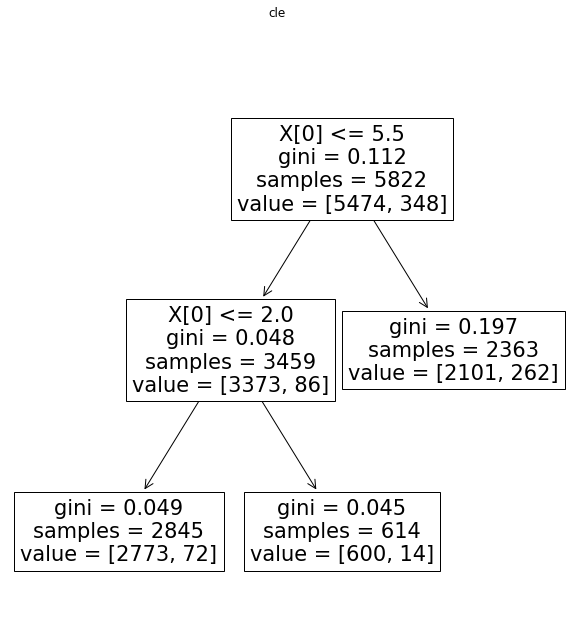

In [10]:
#mt_auto

print(X['mt_auto'].value_counts())

arbre_cla_mta=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mta.fit(X_new[:,0].reshape(X_new.shape[0],1),varexpliquee)
mt_at=np.repeat(-1,X_new.shape[0])
mt_at[X_new[:,0]<=2.0]=0
mt_at[(X_new[:,0]>2.0) & (X_new[:,0]<=5.5)]=1
mt_at[(X_new[:,0]>5.5)]=2

print(mt_at)

for i in range(0,5822):
    X['mt_auto'].iloc[i] = mt_at[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mta) 

print(X['mt_auto'].value_counts())

0    5789
1      31
2       2
Name: nb_bateau, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    5789
1      33
Name: nb_bateau, dtype: int64


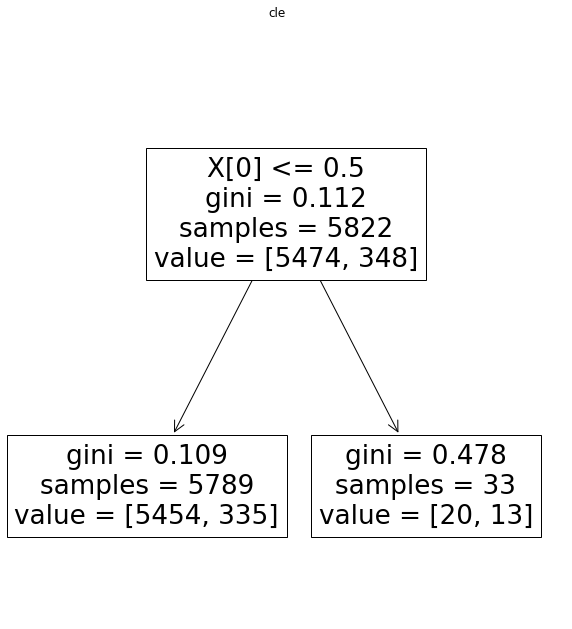

In [11]:
#nb_bateau

print(X['nb_bateau'].value_counts())

arbre_cla_nbb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_nbb.fit(X_new[:,1].reshape(X_new.shape[0],1),varexpliquee)
nb_b=np.repeat(-1,X_new.shape[0])
nb_b[X_new[:,1]<=0.5]=0
nb_b[(X_new[:,1]>0.5)] = 1

print(nb_b)

for i in range(0,5822):
    X['nb_bateau'].iloc[i] = nb_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_nbb) 

print(X['nb_bateau'].value_counts())

0    3482
2    2128
1     201
3      11
Name: mt_RC, dtype: int64
[0 2 2 ... 2 0 1]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0    3482
2    2139
1     201
Name: mt_RC, dtype: int64


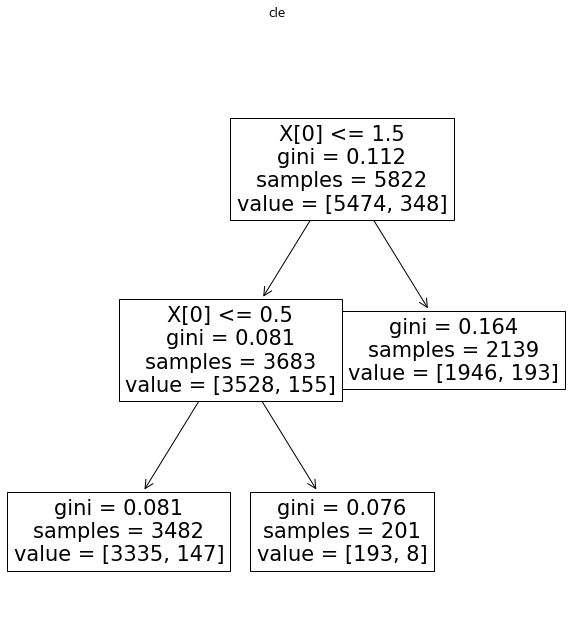

In [12]:
#mt_RC

print(X['mt_RC'].value_counts())

arbre_cla_mtrc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtrc.fit(X_new[:,2].reshape(X_new.shape[0],1),varexpliquee)
mt_rc=np.repeat(-1,X_new.shape[0])
mt_rc[X_new[:,2]<=0.5]=0
mt_rc[(X_new[:,2]>0.5) & (X_new[:,2]<=1.5)]=1
mt_rc[(X_new[:,2]>1.5)]=2

print(mt_rc)

for i in range(0,5822):
    X['mt_RC'].iloc[i] = mt_rc[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtrc) 

print(X['mt_RC'].value_counts())

0    2666
4    1226
3     920
2     535
1     161
6     155
5     149
7       9
8       1
Name: mt_incendie, dtype: int64
[3 1 1 ... 2 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0    2666
2    2146
1     696
3     314
Name: mt_incendie, dtype: int64


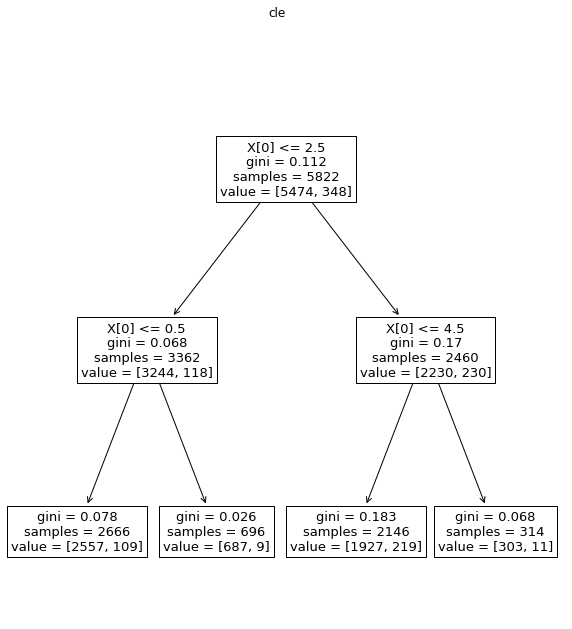

In [13]:
#mt_incendie

print(X['mt_incendie'].value_counts())

arbre_cla_mtinc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtinc.fit(X_new[:,4].reshape(X_new.shape[0],1),varexpliquee)
mt_in=np.repeat(-1,X_new.shape[0])
mt_in[X_new[:,4]<=0.5]=0
mt_in[(X_new[:,4]>0.5) & (X_new[:,4]<=2.5)]=1
mt_in[(X_new[:,4]>2.5) & (X_new[:,4]<=4.5)]=2
mt_in[(X_new[:,4]>4.5)]=3

print(mt_in)

for i in range(0,5822):
    X['mt_incendie'].iloc[i] = mt_in[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtinc) 

print(X['mt_incendie'].value_counts())

0    5789
4      13
3       5
2       5
1       5
6       3
5       2
Name: mt_bateau, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    5789
1      33
Name: mt_bateau, dtype: int64


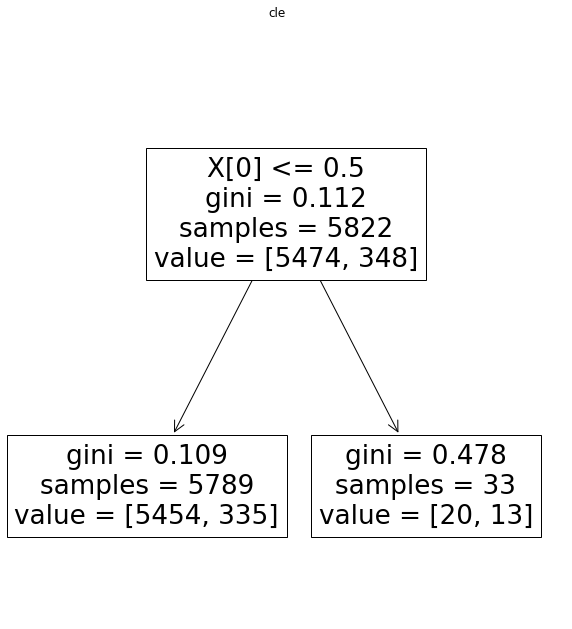

In [14]:
#mt_bateau

print(X['mt_bateau'].value_counts())

arbre_cla_mtb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_mtb.fit(X_new[:,5].reshape(X_new.shape[0],1),varexpliquee)
mt_b=np.repeat(-1,X_new.shape[0])
mt_b[X_new[:,5]<=0.5]=0
mt_b[(X_new[:,5]>0.5)]=1

print(mt_b)

for i in range(0,5822):
    X['mt_bateau'].iloc[i] = mt_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtb) 

print(X['mt_bateau'].value_counts())

3    1932
4    1854
5     733
2     651
6     355
7     131
8      70
1      49
0      25
9      22
Name: revenu_moyen, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


2    2942
1    1932
0     725
3     223
Name: revenu_moyen, dtype: int64


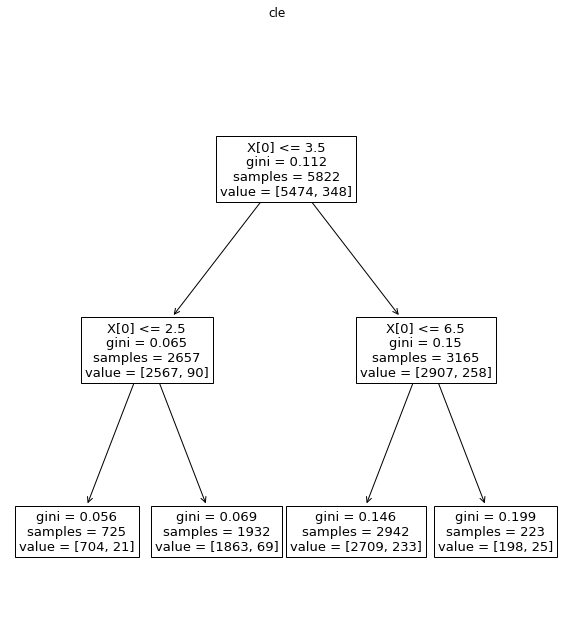

In [15]:
#revenu_moyen

print(X['revenu_moyen'].value_counts())

arbre_cla_rm=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_rm.fit(X_new[:,7].reshape(X_new.shape[0],1),varexpliquee)
rev_moy=np.repeat(-1,X_new.shape[0])
rev_moy[X_new[:,7]<=2.5]=0
rev_moy[(X_new[:,7]>2.5) & (X_new[:,7]<=3.5)]=1
rev_moy[(X_new[:,7]>3.5) & (X_new[:,7]<=6.5)]=2
rev_moy[(X_new[:,7]>6.5)]=3

print(mt_b)

for i in range(0,5822):
    X['revenu_moyen'].iloc[i] = rev_moy[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_rm) 

print(X['revenu_moyen'].value_counts())

0    2147
1    1322
2    1144
3     547
4     326
5     187
6      67
7      51
8      22
9       9
Name: niv_etude_haut, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


1    3013
0    2147
2     513
3     149
Name: niv_etude_haut, dtype: int64


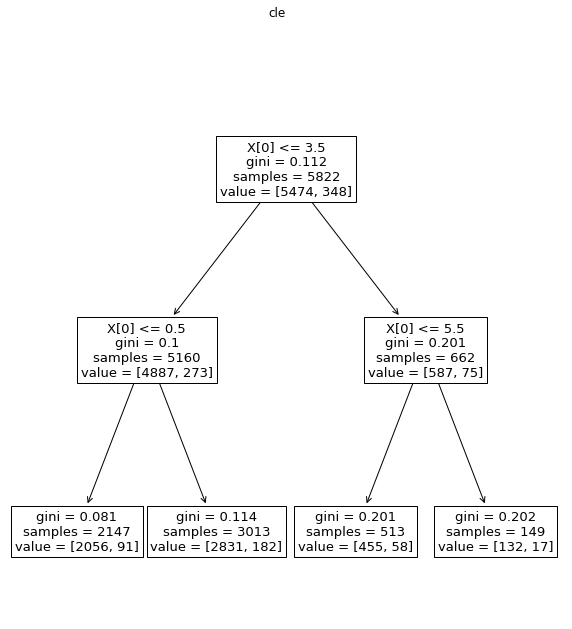

In [16]:
#niv_etude_haut

print(X['niv_etude_haut'].value_counts())

arbre_cla_neh=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_neh.fit(X_new[:,8].reshape(X_new.shape[0],1),varexpliquee)
neh=np.repeat(-1,X_new.shape[0])
neh[X_new[:,8]<=0.5]=0
neh[(X_new[:,8]>0.5) & (X_new[:,8]<=3.5)]=1
neh[(X_new[:,8]>3.5) & (X_new[:,8]<=5.5)]=2
neh[(X_new[:,8]>5.5)]=3

print(mt_b)

for i in range(0,5822):
    X['niv_etude_haut'].iloc[i] = neh[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_neh) 

print(X['niv_etude_haut'].value_counts())

0    1304
2    1094
3    1079
1     630
4     599
5     568
6     293
7     156
9      51
8      48
Name: revenu1, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


1    1724
3    1715
0    1304
2    1079
Name: revenu1, dtype: int64


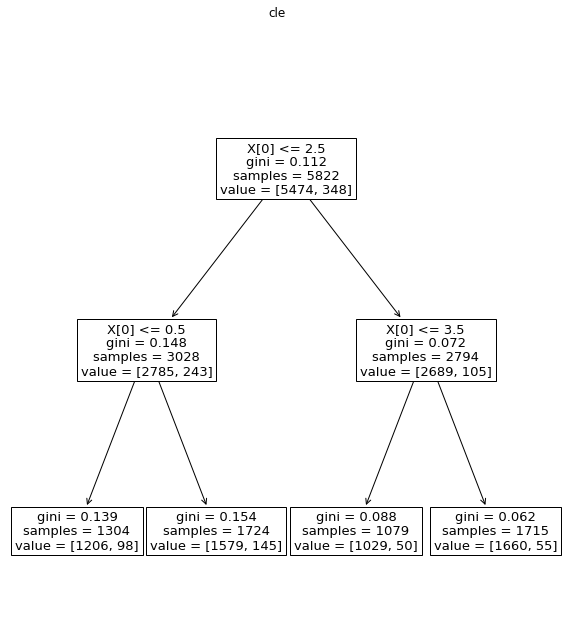

In [17]:
#revenu1

print(X['revenu1'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_r1.fit(X_new[:,9].reshape(X_new.shape[0],1),varexpliquee)
rev_1=np.repeat(-1,X_new.shape[0])
rev_1[X_new[:,9]<=0.5]=0
rev_1[(X_new[:,9]>0.5) & (X_new[:,9]<=2.5)]=1
rev_1[(X_new[:,9]>2.5) & (X_new[:,9]<=3.5)]=2
rev_1[(X_new[:,9]>3.5)]=3

print(mt_b)

for i in range(0,5822):
    X['revenu1'].iloc[i] = rev_1[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_r1) 

print(X['revenu1'].value_counts())

In [18]:
print(X)
print(B)

#Retraitement termine

      mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0           2          0      0              3            3          0   
1           0          0      2              4            1          0   
2           2          0      2              4            1          0   
3           2          0      0              4            1          0   
4           0          0      0              3            3          0   
...       ...        ...    ...            ...          ...        ...   
5817        2          0      2              3            2          0   
5818        0          0      0              5            3          0   
5819        2          0      2              3            2          0   
5820        2          0      0              6            0          0   
5821        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_etude_haut  revenu1  
0                7             2               1   

In [24]:
#Preparation
C = B.copy()

def oversampling(donnees,nom_var):
    data=donnees.copy()
    indexval1=data.index[data[nom_var]==1]
    indexval0=data.index[data[nom_var]==0]
    #tirage aléatoire avec remise des valeurs du groupe 1
    newliste=np.random.choice(indexval1,indexval0.shape[0],replace=True).astype('int32')
    newliste1=[]
    for val in newliste:
        newliste1.append(np.min(np.where(data.index==val)))
    data_over=data.take(newliste1)
    data_over=pd.concat([data_over,data.loc[indexval0]],axis=0)
    return(data_over)

DF = oversampling(C,'assur_caravane')
DF.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
DF= DF.sort_values(by = 'cle')
X_resampled = DF[DF.columns[0:-1]]
y_resampled = DF['assur_caravane']


#Separation en table entrainement et test
#X_train, x_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.25)
X_train = []
y_train = []
x_test = []
y_test = []


print(X_resampled.shape,y_resampled.shape)

for i in range(X_resampled.shape[0]):
    if ((X_resampled.iloc[i,0]<1500)):
        x_test.append(X_resampled.iloc[i,0:11])
        y_test.append(y_resampled.iloc[i])
    else:
        X_train.append(X_resampled.iloc[i,:])
        y_train.append(y_resampled.iloc[i])

y_test2 = []

for i in range(len(y_test)):
    l = []  
    l.append(x_test[i][0])
    l.append(y_test[i])
    y_test2.append(l)

#print(y_test2)

x_test = pd.DataFrame(data=x_test)
X_train = pd.DataFrame(data=X_train)
#print(x_test)
#print(X_train)
del X_train['cle']
del x_test['cle']

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train = std_scale.transform(X_train)
x_test = std_scale.transform(x_test)


parameters = {'penalty':['l1', 'l2'],'C':np.logspace(-10,1,10),'solver':['liblinear','saga']}

model = LogisticRegression()
grid_reg_log = model_selection.GridSearchCV(model,param_grid = parameters,scoring='accuracy')
model_rl = grid_reg_log.fit(X_train,y_train)
print(model_rl.best_params_)
print(model_rl.best_score_) #realise automatiquement par validation croisee

#Prediciton
pred = model_rl.predict(x_test)


print(pred)
for i in range(len(y_test2)):
    y_test2[i].append(pred[i])
#print(y_test2)

y_test3 = []
for nbr in y_test2:
    if nbr not in y_test3:
        y_test3.append(nbr)
#print (y_test3)

c=0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
for nbr in y_test3:
    if(nbr[1] == nbr[2] & nbr[1] == 1):
        c = c + 1
    if(nbr[1] == 1):
        c2 = c2+1
    if((nbr[1] == 0)&(nbr[2] == 1)):
        c3 = c3 + 1
    if((nbr[1] == 1)&(nbr[2] == 0)):
        c4 = c4 + 1
    if((nbr[1] == 0)&(nbr[2] == 0)):
        c5 = c5 + 1

print ("en bas a droite",c)
print (c2)
print("en haut a droite",c3)
print("en bas a gauche",c4)
print("en haut a gauche",c5)
print(c/c2)


(10948, 11) (10948,)


C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.002154434690031887, 'penalty': 'l2', 'solver': 'saga'}
0.6829147593715205
[1 0 1 ... 0 1 0]
en bas a droite 63
92
en haut a droite 456
en bas a gauche 29
en haut a gauche 951
0.6847826086956522


In [25]:
#Preparation
C = B.copy()

def oversampling(donnees,nom_var):
    data=donnees.copy()
    indexval1=data.index[data[nom_var]==1]
    indexval0=data.index[data[nom_var]==0]
    #tirage aléatoire avec remise des valeurs du groupe 1
    newliste=np.random.choice(indexval1,indexval0.shape[0],replace=True).astype('int32')
    newliste1=[]
    for val in newliste:
        newliste1.append(np.min(np.where(data.index==val)))
    data_over=data.take(newliste1)
    data_over=pd.concat([data_over,data.loc[indexval0]],axis=0)
    return(data_over)

DF = oversampling(C,'assur_caravane')
DF.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
DF= DF.sort_values(by = 'cle')
X_resampled = DF[DF.columns[0:-1]]
y_resampled = DF['assur_caravane']


#Separation en table entrainement et test
#X_train, x_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.25)
X_train = []
y_train = []
x_test = []
y_test = []


print(X_resampled.shape,y_resampled.shape)

for i in range(X_resampled.shape[0]):
    if ((X_resampled.iloc[i,0]<1500)):
        x_test.append(X_resampled.iloc[i,0:11])
        y_test.append(y_resampled.iloc[i])
    else:
        X_train.append(X_resampled.iloc[i,:])
        y_train.append(y_resampled.iloc[i])

y_test2 = []

for i in range(len(y_test)):
    l = []  
    l.append(x_test[i][0])
    l.append(y_test[i])
    y_test2.append(l)

#print(y_test2)

x_test = pd.DataFrame(data=x_test)
X_train = pd.DataFrame(data=X_train)
#print(x_test)
#print(X_train)
del X_train['cle']
del x_test['cle']

# définition du modèle
tree= DecisionTreeClassifier(max_depth=9)
treeC=tree.fit(X_train, y_train)

# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

# Prévision de l'échantillon test
pred = treeOpt.predict(x_test)
# matrice de confusion
print(confusion_matrix(y_test,pred))


print(pred)
for i in range(len(y_test2)):
    y_test2[i].append(pred[i])
#print(y_test2)

y_test3 = []
for nbr in y_test2:
    if nbr not in y_test3:
        y_test3.append(nbr)
#print (y_test3)

c=0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
for nbr in y_test3:
    if(nbr[1] == nbr[2] & nbr[1] == 1):
        c = c + 1
    if(nbr[1] == 1):
        c2 = c2+1
    if((nbr[1] == 0)&(nbr[2] == 1)):
        c3 = c3 + 1
    if((nbr[1] == 1)&(nbr[2] == 0)):
        c4 = c4 + 1
    if((nbr[1] == 0)&(nbr[2] == 0)):
        c5 = c5 + 1

print ("en bas a droite",c)
print (c2)
print("en haut a droite",c3)
print("en bas a gauche",c4)
print("en haut a gauche",c5)
print(c/c2)

(10948, 11) (10948,)
Meilleur score = 0.309433, Meilleur paramètre = {'max_depth': 2}
[[ 889  518]
 [ 398 1054]]
[1 0 1 ... 0 1 1]
en bas a droite 67
92
en haut a droite 518
en bas a gauche 25
en haut a gauche 889
0.7282608695652174


C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The optimal parameters are {'C': 10, 'gamma': 1, 'kernel': 'rbf'} with a score of 0.87
[-0.8504632   0.79328423  0.87690133 ...  1.00039849  1.00000942
  1.0004087 ]
0.9128206069179032


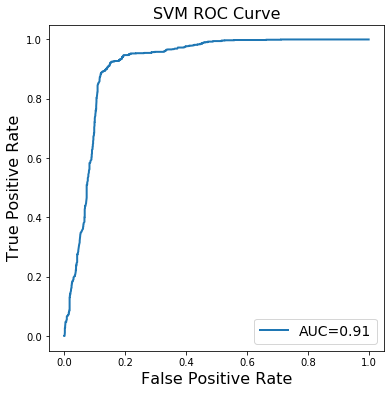

In [26]:
#SVM (5 minutes d execution)

#Over / Under sampling

#Bon Resultat 
from imblearn.over_sampling import SMOTE, ADASYN
X_svm, y_svm = SMOTE().fit_resample(X, y)

#Separation jeu entrainement, test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_svm, y_svm, test_size=0.2)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

# Pour svm, on doit standardiser les donnes

# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# definir les hyperp parametres 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf','sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid) 
  
# on test le modele optimal
grille = grid.fit(X_train_std, y_train) 

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grille.best_params_, grid.best_score_))

# prédire sur le jeu de test avec le modèle optimisé
y_pred = grille.decision_function(X_test_std)
print(y_pred)
# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)
print(auc_cv)

# La courbe ROC
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='AUC=%.2f' % auc_cv)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()

In [30]:
#Baysien naïf

#Preparation
C = B.copy()

def oversampling(donnees,nom_var):
    data=donnees.copy()
    indexval1=data.index[data[nom_var]==1]
    indexval0=data.index[data[nom_var]==0]
    #tirage aléatoire avec remise des valeurs du groupe 1
    newliste=np.random.choice(indexval1,indexval0.shape[0],replace=True).astype('int32')
    newliste1=[]
    for val in newliste:
        newliste1.append(np.min(np.where(data.index==val)))
    data_over=data.take(newliste1)
    data_over=pd.concat([data_over,data.loc[indexval0]],axis=0)
    return(data_over)

DF = oversampling(C,'assur_caravane')
DF.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
DF= DF.sort_values(by = 'cle')
X_resampled = DF[DF.columns[0:-1]]
y_resampled = DF['assur_caravane']


#Separation en table entrainement et test
#X_train, x_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.25)
X_train = []
y_train = []
x_test = []
y_test = []


print(X_resampled.shape,y_resampled.shape)

for i in range(X_resampled.shape[0]):
    if ((X_resampled.iloc[i,0]<1500)):
        x_test.append(X_resampled.iloc[i,0:11])
        y_test.append(y_resampled.iloc[i])
    else:
        X_train.append(X_resampled.iloc[i,:])
        y_train.append(y_resampled.iloc[i])

y_test2 = []

for i in range(len(y_test)):
    l = []  
    l.append(x_test[i][0])
    l.append(y_test[i])
    y_test2.append(l)

#print(y_test2)

x_test = pd.DataFrame(data=x_test)
X_train = pd.DataFrame(data=X_train)
#print(x_test)
#print(X_train)
del X_train['cle']
del x_test['cle']

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train = std_scale.transform(X_train)
x_test = std_scale.transform(x_test)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)

pred = gnb.predict(x_test)
print(confusion_matrix(y_test, pred))

print(gnb.score(X_train,y_train))

print(pred)
for i in range(len(y_test2)):
    y_test2[i].append(pred[i])
#print(y_test2)

y_test3 = []
for nbr in y_test2:
    if nbr not in y_test3:
        y_test3.append(nbr)
#print (y_test3)

c=0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
for nbr in y_test3:
    if(nbr[1] == nbr[2] & nbr[1] == 1):
        c = c + 1
    if(nbr[1] == 1):
        c2 = c2+1
    if((nbr[1] == 0)&(nbr[2] == 1)):
        c3 = c3 + 1
    if((nbr[1] == 1)&(nbr[2] == 0)):
        c4 = c4 + 1
    if((nbr[1] == 0)&(nbr[2] == 0)):
        c5 = c5 + 1

print ("en bas a droite",c)
print (c2)
print("en haut a droite",c3)
print("en bas a gauche",c4)
print("en haut a gauche",c5)
print(c/c2)




(10948, 11) (10948,)
[[1280  127]
 [ 981  432]]
0.6182332677165354
[0 0 0 ... 0 0 0]
en bas a droite 27
92
en haut a droite 127
en bas a gauche 65
en haut a gauche 1280
0.29347826086956524


Train on 4864 samples, validate on 1217 samples
Epoch 1/500
4864/4864 [==============================] - 1s 153us/sample - loss: 0.6994 - accuracy: 0.4476 - val_loss: 0.6931 - val_accuracy: 0.4906
Epoch 2/500
4864/4864 [==============================] - 0s 48us/sample - loss: 0.6907 - accuracy: 0.5407 - val_loss: 0.6870 - val_accuracy: 0.5703
Epoch 3/500
4864/4864 [==============================] - 0s 43us/sample - loss: 0.6813 - accuracy: 0.5898 - val_loss: 0.6712 - val_accuracy: 0.6261
Epoch 4/500
4864/4864 [==============================] - 0s 40us/sample - loss: 0.6608 - accuracy: 0.6328 - val_loss: 0.6487 - val_accuracy: 0.6434
Epoch 5/500
4864/4864 [==============================] - 0s 40us/sample - loss: 0.6395 - accuracy: 0.6641 - val_loss: 0.6273 - val_accuracy: 0.6598
Epoch 6/500
4864/4864 [==============================] - 0s 45us/sample - loss: 0.6192 - accuracy: 0.6836 - val_loss: 0.6078 - val_accuracy: 0.6828
Epoch 7/500
4864/4864 [==============================] - 0s 49u

Epoch 56/500
4864/4864 [==============================] - 0s 40us/sample - loss: 0.4606 - accuracy: 0.7722 - val_loss: 0.4567 - val_accuracy: 0.7724
Epoch 57/500
4864/4864 [==============================] - 0s 39us/sample - loss: 0.4589 - accuracy: 0.7773 - val_loss: 0.4582 - val_accuracy: 0.7699
Epoch 58/500
4864/4864 [==============================] - 0s 40us/sample - loss: 0.4579 - accuracy: 0.7771 - val_loss: 0.4558 - val_accuracy: 0.7707
Epoch 59/500
4864/4864 [==============================] - 0s 38us/sample - loss: 0.4582 - accuracy: 0.7784 - val_loss: 0.4559 - val_accuracy: 0.7658
Epoch 60/500
4864/4864 [==============================] - 0s 51us/sample - loss: 0.4583 - accuracy: 0.7757 - val_loss: 0.4556 - val_accuracy: 0.7732
Epoch 61/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.4565 - accuracy: 0.7806 - val_loss: 0.4574 - val_accuracy: 0.7773
Epoch 62/500
4864/4864 [==============================] - 0s 37us/sample - loss: 0.4580 - accuracy: 0.7788

Epoch 111/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.4356 - accuracy: 0.8045 - val_loss: 0.4330 - val_accuracy: 0.8061
Epoch 112/500
4864/4864 [==============================] - 0s 45us/sample - loss: 0.4344 - accuracy: 0.8018 - val_loss: 0.4321 - val_accuracy: 0.8118
Epoch 113/500
4864/4864 [==============================] - 0s 45us/sample - loss: 0.4358 - accuracy: 0.8049 - val_loss: 0.4338 - val_accuracy: 0.7954
Epoch 114/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.4343 - accuracy: 0.8063 - val_loss: 0.4319 - val_accuracy: 0.8003
Epoch 115/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.4333 - accuracy: 0.8055 - val_loss: 0.4300 - val_accuracy: 0.8135
Epoch 116/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.4335 - accuracy: 0.8047 - val_loss: 0.4298 - val_accuracy: 0.8110
Epoch 117/500
4864/4864 [==============================] - 0s 37us/sample - loss: 0.4328 - accuracy:

Epoch 220/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.4020 - accuracy: 0.8240 - val_loss: 0.4069 - val_accuracy: 0.8291
Epoch 221/500
4864/4864 [==============================] - 0s 40us/sample - loss: 0.4013 - accuracy: 0.8259 - val_loss: 0.4065 - val_accuracy: 0.8332
Epoch 222/500
4864/4864 [==============================] - 0s 38us/sample - loss: 0.4005 - accuracy: 0.8277 - val_loss: 0.4085 - val_accuracy: 0.8127
Epoch 223/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.3998 - accuracy: 0.8213 - val_loss: 0.4082 - val_accuracy: 0.8283
Epoch 224/500
4864/4864 [==============================] - 0s 36us/sample - loss: 0.4008 - accuracy: 0.8246 - val_loss: 0.4077 - val_accuracy: 0.8233
Epoch 225/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.4009 - accuracy: 0.8230 - val_loss: 0.4079 - val_accuracy: 0.8307
Epoch 226/500
4864/4864 [==============================] - 0s 38us/sample - loss: 0.3975 - accuracy:

Epoch 329/500
4864/4864 [==============================] - 0s 38us/sample - loss: 0.3891 - accuracy: 0.8271 - val_loss: 0.4187 - val_accuracy: 0.8069
Epoch 330/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.3908 - accuracy: 0.8310 - val_loss: 0.4015 - val_accuracy: 0.8389
Epoch 331/500
4864/4864 [==============================] - 0s 39us/sample - loss: 0.3861 - accuracy: 0.8285 - val_loss: 0.4024 - val_accuracy: 0.8266
Epoch 332/500
4864/4864 [==============================] - 0s 39us/sample - loss: 0.3879 - accuracy: 0.8259 - val_loss: 0.4006 - val_accuracy: 0.8266
Epoch 333/500
4864/4864 [==============================] - 0s 42us/sample - loss: 0.3901 - accuracy: 0.8224 - val_loss: 0.3991 - val_accuracy: 0.8209
Epoch 334/500
4864/4864 [==============================] - 0s 37us/sample - loss: 0.3865 - accuracy: 0.8308 - val_loss: 0.4015 - val_accuracy: 0.8242
Epoch 335/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.3876 - accuracy:

Epoch 438/500
4864/4864 [==============================] - 0s 43us/sample - loss: 0.3800 - accuracy: 0.8456 - val_loss: 0.4266 - val_accuracy: 0.8061
Epoch 439/500
4864/4864 [==============================] - 0s 39us/sample - loss: 0.3813 - accuracy: 0.8368 - val_loss: 0.3908 - val_accuracy: 0.8439
Epoch 440/500
4864/4864 [==============================] - 0s 40us/sample - loss: 0.3778 - accuracy: 0.8390 - val_loss: 0.3913 - val_accuracy: 0.8365
Epoch 441/500
4864/4864 [==============================] - 0s 40us/sample - loss: 0.3772 - accuracy: 0.8398 - val_loss: 0.3922 - val_accuracy: 0.8389
Epoch 442/500
4864/4864 [==============================] - 0s 39us/sample - loss: 0.3796 - accuracy: 0.8386 - val_loss: 0.3887 - val_accuracy: 0.8455
Epoch 443/500
4864/4864 [==============================] - 0s 41us/sample - loss: 0.3802 - accuracy: 0.8407 - val_loss: 0.4029 - val_accuracy: 0.8225
Epoch 444/500
4864/4864 [==============================] - 0s 37us/sample - loss: 0.3807 - accuracy:

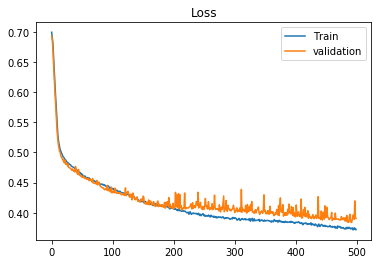

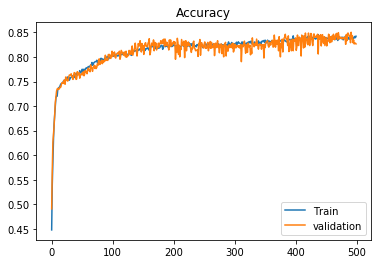

1521/1521 [==============================] - 0s 91us/sample - loss: 1.3356 - accuracy: 0.5214
(1521,)
(1521,)
[[382 347]
 [381 411]]


In [31]:
#Reseau de neurone

import tensorflow as tf

# Utilisation du package tensorflow a installer

#print(X)
#print(y)

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_rn, y_rn = smote_enn.fit_resample(X, y)


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_rn, y_rn, test_size=0.2,random_state = 1)

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation = "relu"))
model.add(tf.keras.layers.Dense(5, activation = "relu"))
model.add(tf.keras.layers.Dense(2, activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

history= model.fit(X_train, y_train, epochs = 500,validation_split = 0.2)

model.summary()

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label = "Train")
plt.plot(loss_val_curve, label="validation")
plt.title("Loss")
plt.legend()
plt.show()

plt.plot(acc_curve, label = "Train")
plt.plot(acc_val_curve, label="validation")
plt.title("Accuracy")
plt.legend()
plt.show()

model.evaluate(X_test_std,y_test)

y_pred = model.predict(X_test_std)

L = []
for i in range(1521):
    if y_pred[i][0] > y_pred[i][1]:
        L.append(0)
    else:
        L.append(1)

print(y_test.shape)
y_pred_fin = np.array(L)
print(y_pred_fin.shape)
print(confusion_matrix(y_test, y_pred_fin))